In [2]:
from sklearn.datasets import load_breast_cancer


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Расчет точности
accuracy = accuracy_score(y_test, y_pred)

print(f'Точность модели: {accuracy}')


Точность модели: 0.9649122807017544


Для отбора признаков с низкой дисперсией вы можете использовать класс VarianceThreshold из модуля sklearn.feature_selection. Этот метод удаляет все признаки, дисперсия которых не достигает определенного порога.
В этом коде мы сначала загружаем данные, затем создаем объект VarianceThreshold с порогом 0.8. Затем мы применяем этот объект к нашим данным, что приводит к удалению всех признаков с дисперсией меньше 0.8.

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import VarianceThreshold


# Создание объекта VarianceThreshold
selector = VarianceThreshold(threshold=0.8)

# Применение selector к данным
data_transformed = selector.fit_transform(data.data)

print(f'Исходное количество признаков: {data.data.shape[1]}')
print(f'Количество признаков после отбора: {data_transformed.shape[1]}')


Исходное количество признаков: 30
Количество признаков после отбора: 10


# На сокращенном датасете обучите модель случайного леса (Random Forest). Рассчитайте точность.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_transformed, data.target, test_size=0.2, random_state=42)

# Создание модели случайного леса
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Расчет точности
accuracy = accuracy_score(y_test, y_pred)

print(f'Точность модели: {accuracy}')

Точность модели: 0.9473684210526315


К исходному (большому) датасету примените метод PCA, найдите 2 главные компоненты.

В этом коде мы сначала загружаем данные, затем создаем объект PCA с двумя компонентами. Затем мы применяем PCA к нашим данным, что приводит к преобразованию исходных признаков в две главные компоненты

In [6]:
from sklearn.decomposition import PCA

# Создание объекта PCA с двумя компонентами
pca = PCA(n_components=2)

# Применение PCA к данным
data_transformed = pca.fit_transform(data.data)

X_train, X_test, y_train, y_test = train_test_split(data_transformed, data.target, test_size=0.2, random_state=42)
print(f'Исходное количество признаков: {data.data.shape[1]}')
print(f'Количество признаков после PCA: {data_transformed.shape[1]}')

Исходное количество признаков: 30
Количество признаков после PCA: 2


# Визуализируйте данные по этим двум компонентам.


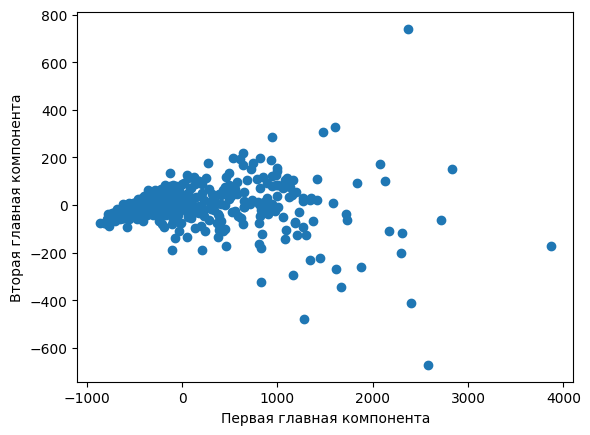

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Первая главная компонента по оси X, вторая главная компонента по оси Y
ax.scatter(data_transformed[:, 0], data_transformed[:, 1])

ax.set_xlabel('Первая главная компонента')
ax.set_ylabel('Вторая главная компонента')

plt.show()


# 7. Обучите модель случайного леса на полученной модели PCA с двумя компонентами. Оцените точность и время.

In [8]:
# Создание модели случайного леса
import time


model = RandomForestClassifier(n_estimators=100, random_state=42)

start_time = time.time()

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Расчет точности
accuracy = accuracy_score(y_test, y_pred)

execution_time = time.time() - start_time

print(f'Точность модели: {accuracy}')
print(f'Время выполнения: {execution_time} секунд')

Точность модели: 0.956140350877193
Время выполнения: 0.39066004753112793 секунд


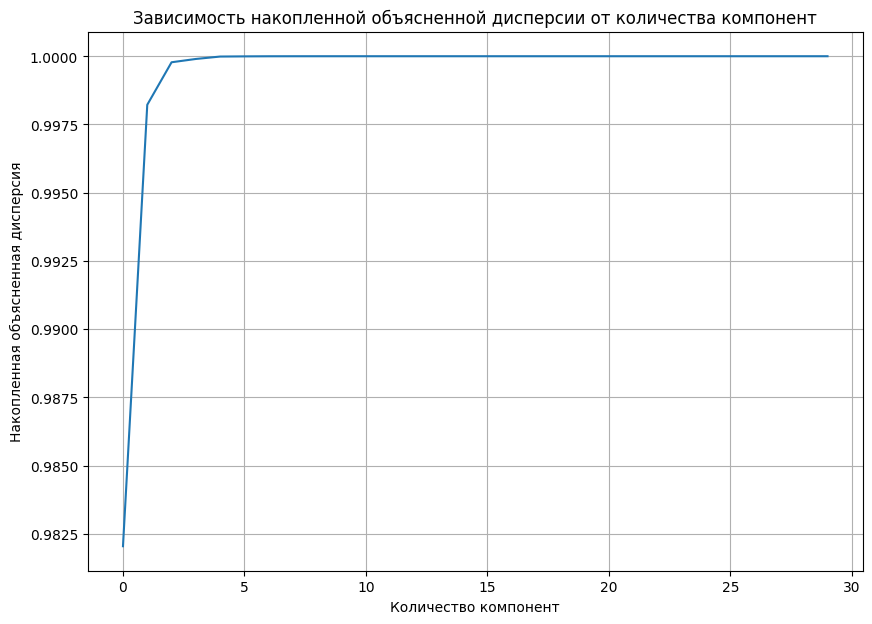

Минимальное количество компонент, объясняющих 90% дисперсии: 1


In [9]:
# Создание объекта PCA с максимальным количеством компонент
import numpy as np


pca = PCA(n_components=None)

# Применение PCA к данным
pca.fit(data.data)

# Расчет накопленной объясненной дисперсии
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Построение графика
plt.figure(figsize=(10, 7))
plt.plot(cumulative_explained_variance)
plt.xlabel('Количество компонент')
plt.ylabel('Накопленная объясненная дисперсия')
plt.title('Зависимость накопленной объясненной дисперсии от количества компонент')
plt.grid(True)
plt.show()

# Нахождение минимального количества компонент, которые объясняют 90% дисперсии
n_components = np.where(cumulative_explained_variance >= 0.9)[0][0] + 1
print(f'Минимальное количество компонент, объясняющих 90% дисперсии: {n_components}')

In [10]:
# Применение PCA с двумя компонентами
pca = PCA(n_components=2)
data_transformed = pca.fit_transform(data.data)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data_transformed, data.target, test_size=0.2, random_state=42)

# Создание модели случайного леса
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Засекаем время
start_time = time.time()

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Расчет точности
accuracy = accuracy_score(y_test, y_pred)

# Расчет времени выполнения
execution_time = time.time() - start_time

print(f'Точность модели: {accuracy}')
print(f'Время выполнения: {execution_time} секунд')

Точность модели: 0.956140350877193
Время выполнения: 0.37215757369995117 секунд
